In [1]:
from fairworkflows import FairStep, FairWorkflow, fairstep
import rdflib

# Load a FairStep from a nanopub description

In [2]:
step = FairStep.from_nanopub(uri='http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step')

In [3]:
print(step)

Step URI = http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step
@prefix ns1: <http://purl.org/dc/terms/> .

_:Ne7c7c4b6d8224998886659df3956c17e {
    [] a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Preheat an oven to 350 degrees F (175 degrees C)." .
}




In [4]:
step.validate()

In [5]:
step.is_pplan_step

True

In [6]:
step.description

rdflib.term.Literal('Preheat an oven to 350 degrees F (175 degrees C).')

In [7]:
step.is_manual_task

True

In [8]:
step.is_script_task

False

# Create a FairWorkflow
Then add a few steps to it.

In [9]:
# Create a workflow
workflow = FairWorkflow(description='This is a test workflow.')

In [10]:
# Load some steps from nanopublications
preheat_oven = FairStep.from_nanopub(uri='http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step')
melt_butter = FairStep.from_nanopub(uri='http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step')
arrange_chicken = FairStep.from_nanopub(uri='http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#step')

In [11]:
# Specify ordering of steps
workflow.add(melt_butter, follows=preheat_oven)
workflow.add(arrange_chicken, follows=melt_butter)

In [12]:
# Does it validate? No.
workflow.validate()

AssertionError: Plan RDF does not specify a first step (pwo:hasFirstStep)


In [13]:
# Specify the first step in the plan
workflow.first_step = preheat_oven

In [14]:
# Print workflow rdf
print(workflow)

Workflow URI = None
@prefix ns1: <http://purl.org/net/p-plan#> .
@prefix ns2: <http://purl.org/spar/pwo/> .
@prefix ns3: <http://purl.org/dc/terms/> .
@prefix ns4: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .

_:N10db41198a35448a9e1bc49e858e7273 {
    <http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#step> ns1:isStepOfPlan _:plan .

    <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> ns1:isStepOfPlan _:plan ;
        ns4:precedes <http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step> .

    <http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#step> ns1:isStepOfPlan _:plan ;
        ns4:precedes <http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#step> .

    _:plan a ns1:Plan ;
        ns3:description "This is a test workflow." ;
        ns2:hasFirstStep <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> .
}




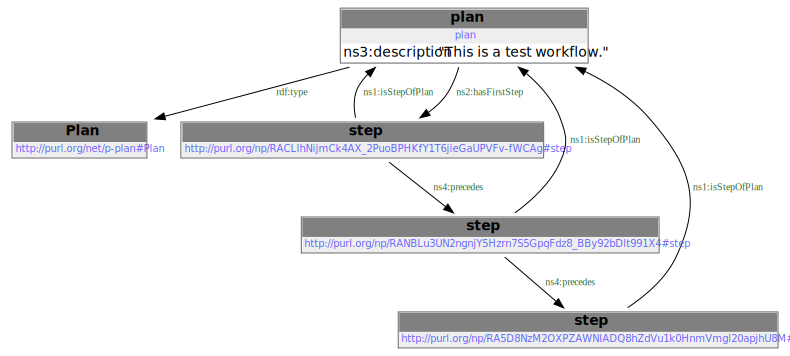

In [15]:
# What does the graph look like?
workflow.display()

# What if we want to add computational steps?
You can convert a python function to a FairStep and add it to the plex workflow.

In [16]:
# Define your computational step as a function
def a_computational_step(x, y):
    """A test function that adds two numbers"""
    return x + y

In [17]:
# Make it a FairStep and add it to the workflow
new_step = FairStep.from_function(a_computational_step)
workflow.add(new_step)

# Alternatively, use the @fairstep decorator
Use the decorator on any function that defines a computational step you wish to carry out. Each time it is called, a FairStep describing that step will be created and added to the plex workflow. This includes any input variables and their values.

In [18]:
@fairstep(workflow)
def another_computational_step(a, b):
    """Another script task"""
    return a * b

In [19]:
# Run the step
another_computational_step(1, 5)

In [20]:
# Run it again with different inputs
another_computational_step(4, 3)

In [21]:
# Both computational steps have now been added to the plex workflow
print(workflow)

Workflow URI = None
@prefix ns1: <http://purl.org/net/p-plan#> .
@prefix ns2: <http://purl.org/spar/pwo/> .
@prefix ns3: <http://purl.org/dc/terms/> .
@prefix ns4: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix ns5: <http://purl.org/np/RA5D8NzM2OXPZAWNlADQ8hZdVu1k0HnmVmgl20apjhU8M#> .
@prefix ns6: <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#> .
@prefix ns7: <http://purl.org/np/RANBLu3UN2ngnjY5Hzrn7S5GpqFdz8_BBy92bDlt991X4#> .

_:N10db41198a35448a9e1bc49e858e7273 {
    <http://purl.org/nanopub/temp/mynanopub#functiona_computational_step1601299750.9890509> ns1:isStepOfPlan _:plan ;
        ns4:precedes <http://purl.org/nanopub/temp/mynanopub#functionanother_computational_step1601299751.68171> .

    <http://purl.org/nanopub/temp/mynanopub#functionanother_computational_step1601299751.68171> ns1:isStepOfPlan _:plan ;
        ns4:precedes <http://purl.org/nanopub/temp/mynanopub#functionanother_computational_step1601299751.893827> .

    <http://purl

# Walking the workflow graph
We can now ask the FairWorkflow object to give us each step of the workflow we have constructed, one at a time. This is in the correct order (taking into account precedence defined earlier).

In [22]:
for step in workflow:
    print(step)

Step URI = http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step
@prefix ns1: <http://purl.org/dc/terms/> .

_:Nd27aff94ec474a11bcf7d3d075f564d9 {
    [] a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Preheat an oven to 350 degrees F (175 degrees C)." .
}


Step URI = http://purl.org/nanopub/temp/mynanopub#functiona_computational_step1601299750.9890509
@prefix ns1: <http://purl.org/dc/terms/> .

_:N5bf9df7b51d042c18b2ef61e8d72af1a {
    [] a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ScriptTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description """def a_computational_step(x, y):
    \"\"\"A test function that adds two numbers\"\"\"
    return x + y
""" .
}


Step URI = http://purl.org/nanopub/temp/mynanopub#functionanother_computational_step1601299751.68171
@prefix ns1: <http://purl.org/dc/terms/> .

_:Nef9e50c857284e1c9a478af0eff0e3c0 {
    [] a <http://dkm.fbk.

# Initialize a Fairworkflow object directly from RDF

### An example RDF graph in the PLEX format.
Note that 2 steps are fully described in the RDF, but the last step refers to a nanopub publication

In [23]:
plex_rdf_trig = '''
@prefix this: <http://www.example.org/workflow1> .
@prefix sub: <http://www.example.org/workflow1#> .
@prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix pplan: <http://purl.org/net/p-plan#> .
@prefix terms: <http://purl.org/dc/terms/> .
@prefix pwo: <http://purl.org/spar/pwo/> .
@prefix bpmn: <http://dkm.fbk.eu/index.php/BPMN2_Ontology#> .

{
    sub:step1 dul:precedes sub:step2 .
    sub:step2 dul:precedes <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> .
    
    this: a pplan:Plan ;
       terms:description "This is a test workflow." ;
       pwo:hasFirstStep sub:step1 .

    sub:step1 pplan:isStepOfPlan this:;
        a pplan:Step;
        terms:description "Step 1";
        a bpmn:ManualTask .

    sub:step2 pplan:isStepOfPlan this:;
        a pplan:Step;
        terms:description "Step 2";
        a bpmn:ManualTask .

    <http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step> pplan:isStepOfPlan this: .
}
'''

In [24]:
g = rdflib.Graph()
g.parse(data=plex_rdf_trig, format='trig')

<Graph identifier=N8984659843d540e7a8b82b0a7ab357dc (<class 'rdflib.graph.Graph'>)>

In [25]:
workflow = FairWorkflow.from_rdf(rdf=g, uri='http://www.example.org/workflow1', fetch_steps=False)

/Users/svenvanderburg/projects/fair-workflows/FAIRWorkbench/fairworkflows/fairworkflow.py:76: UserWarning: Could not get detailed information for step http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step, adding a FairStep without attributes. This will limit functionality of the FairWorkflow object.
  warnings.warn(f'Could not get detailed information for '


In [26]:
workflow = FairWorkflow.from_rdf(rdf=g, uri='http://www.example.org/workflow1', fetch_steps=True)

In [29]:
workflow.validate()

In [30]:
for step in workflow:
    print(step)

Step URI = http://www.example.org/workflow1#step1
@prefix ns1: <http://purl.org/dc/terms/> .

_:Nd84e0ee3b90d4922a318a9552b0bdf69 {
    [] a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Step 1" .
}


Step URI = http://www.example.org/workflow1#step2
@prefix ns1: <http://purl.org/dc/terms/> .

_:N801b92b6aa0d44ac976af13e615f3f6c {
    [] a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Step 2" .
}


Step URI = http://purl.org/np/RACLlhNijmCk4AX_2PuoBPHKfY1T6jieGaUPVFv-fWCAg#step
@prefix ns1: <http://purl.org/dc/terms/> .

_:Nee35e6d28a9c4df08b9bb2e9a3af1840 {
    [] a <http://dkm.fbk.eu/index.php/BPMN2_Ontology#ManualTask>,
            <http://purl.org/net/p-plan#Step> ;
        ns1:description "Preheat an oven to 350 degrees F (175 degrees C)." .
}




# Fairstep inputs and outputs

Let's construct a new test workflow

In [83]:
test_description = 'This is a test workflow.'
workflow = FairWorkflow(description=test_description)

step1 = FairStep(uri='http://www.example.org/step1')
step2 = FairStep(uri='http://www.example.org/step2')

workflow.first_step = step1
workflow.add(step2, follows=step1)

Now let's add some inputs and outputs and validate those

In [90]:
step1.inputs = ['var4']
step1.outputs = ['var2']
step2.inputs = ['var2', 'var3']
step2.outputs = ['var4']

Let's validate, remember that the step precedence is step1 -> step2

In [91]:
workflow.validate()

AssertionError: step has input var4 that is the output of a later step


We made a mistake there, let's fix it!

In [92]:
step1.inputs = ['var1']
step1.outputs = ['var2']
step2.inputs = ['var2', 'var3']
step2.outputs = ['var4']

In [93]:
workflow.validate()

We can check the unbound inputs
(Unbound inputs are inputs that are not outputs of any preceding step.
You could consider them inputs for the workflow.)

In [94]:
for input, step in workflow.unbound_inputs:
    print(f'{step.uri} has an unbound input {input}')

http://www.example.org/step1 has an unbound input var1
http://www.example.org/step2 has an unbound input var3


And unbound outputs

In [95]:
for output, step in workflow.unbound_outputs:
    print(f'{step.uri} has an unbound output {output}')

http://www.example.org/step2 has an unbound output var4
